In [ ]:
""" This  is the first notebook version of my project . This Project is done for the Problem Statement : "To implement a navigation graph for our college campus (LNCT)
using concepts of Graph theory . This project calculates the shortest path  between any two blocks of college campus using the Dijkstra Algorithm and with the help of
python libraries .


About the Project :    This project is implementing a graph with nodes(campus blocks  and buildings )and edges (distance between them which are taken approximately ) .
 The plotting of the graph and the mapping of nodes is done manually with coordinates . Graph and Data Visualization is done with the help of networkx and matplot libraries ,
  which also include representation and visualization of mappings in  table form . The User can input Start and End Positions with the help of point sliders created with the help
   of widget library to interact with .


 Run this Notebook:    To use this notebook , run the cell below and see the output graphs and tables generated. Use the point slider to adjust the starting and end positions
to navigate and find the shortest distance between the nodes or points .  A graph representing your starting and end position with red edge line and the shortest distance
 between your selected points will be displayed  to you .


 ~ © Aadarsh Malviya
  """

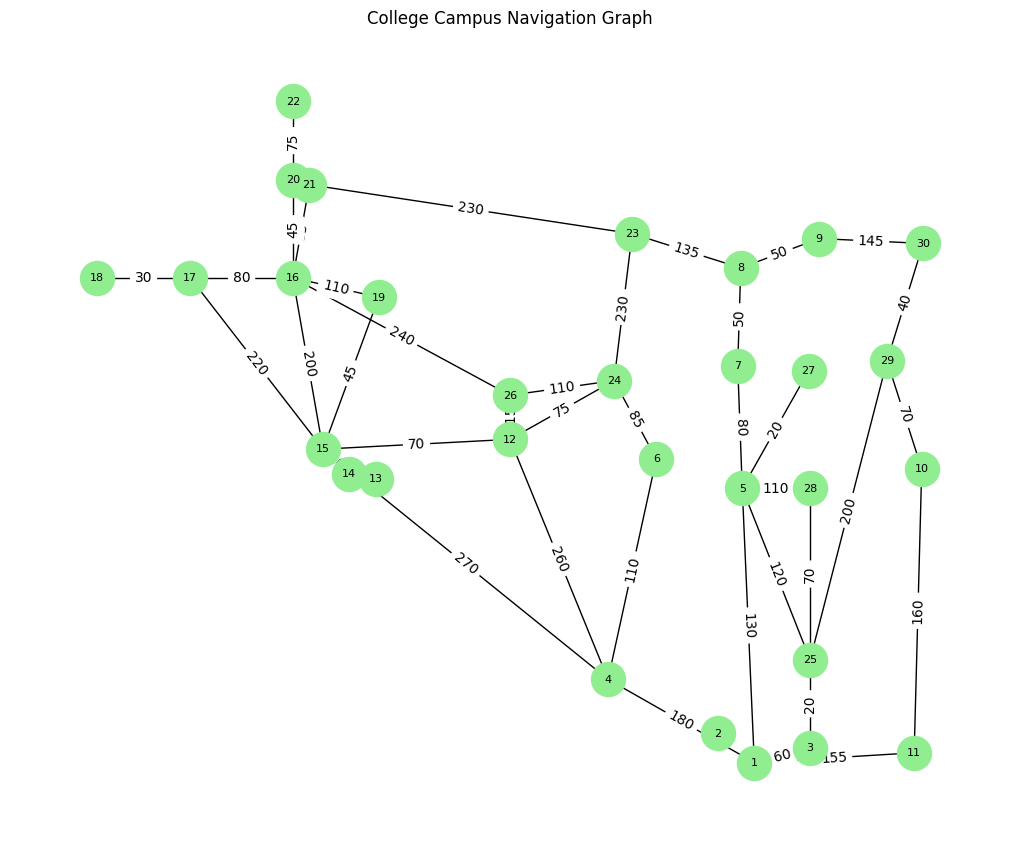

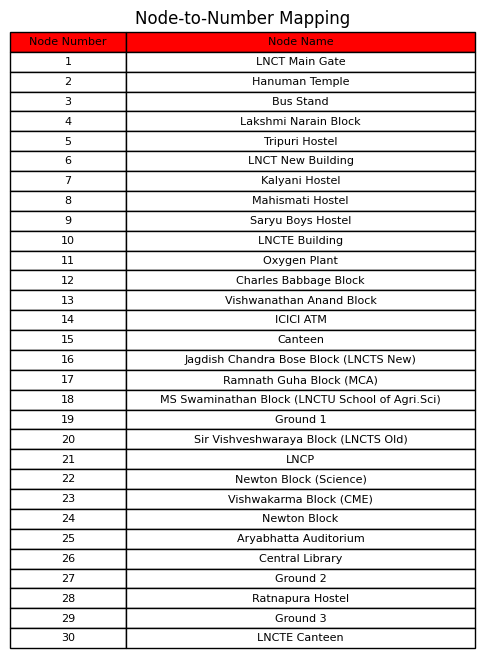

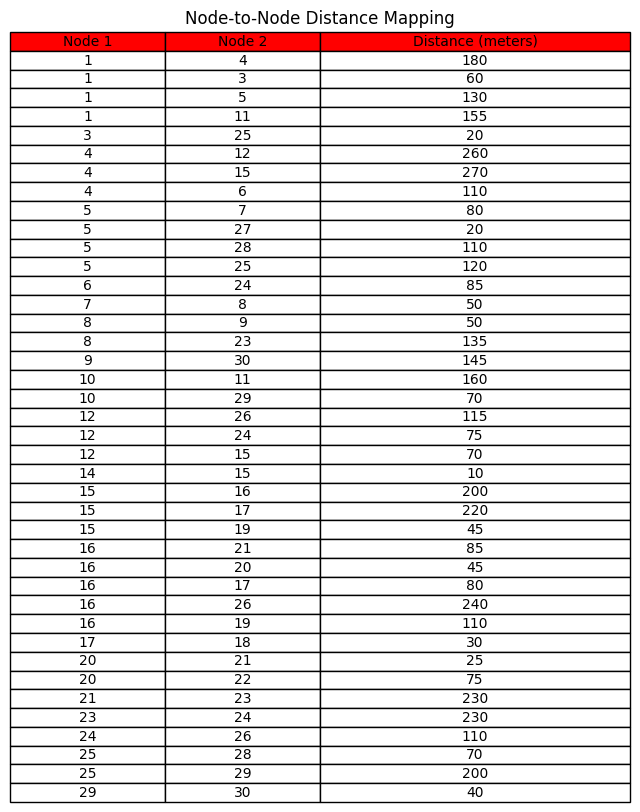

interactive(children=(IntSlider(value=15, description='start', max=30, min=1), IntSlider(value=15, description…

In [ ]:
import networkx as nex
import matplotlib.pyplot as plt
from matplotlib.table import Table
from ipywidgets import interact

# Creating Map graph by adding Nodes (LNCT Campus Checkpoints and Blocks) and Edges (Distance between any two nodes)
M = nex.Graph()

# Node mapping assigning numbers to names
node_mapping = {
    1: 'LNCT Main Gate', 2: 'Hanuman Temple', 3: 'Bus Stand', 4: 'Lakshmi Narain Block', 5: 'Tripuri Hostel',
    6: 'LNCT New Building', 7: 'Kalyani Hostel', 8: 'Mahismati Hostel', 9: 'Saryu Boys Hostel', 10: 'LNCTE Building',
    11: 'Oxygen Plant', 12: 'Charles Babbage Block', 13: 'Vishwanathan Anand Block', 14: 'ICICI ATM', 15: 'Canteen',
    16: 'Jagdish Chandra Bose Block (LNCTS New)', 17: 'Ramnath Guha Block (MCA)',
    18: 'MS Swaminathan Block (LNCTU School of Agri.Sci)', 19: 'Ground 1', 20: 'Sir Vishveshwaraya Block (LNCTS Old)',
    21: 'LNCP', 22: 'Newton Block (Science)', 23: 'Vishwakarma Block (CME)', 24: 'Newton Block',
    25: 'Aryabhatta Auditorium', 26: 'Central Library', 27: 'Ground 2', 28: 'Ratnapura Hostel',
    29: 'Ground 3', 30: 'LNCTE Canteen'
}

reverse_mapping = {name: num for num, name in node_mapping.items()}

# Adding nodes to the graph
M.add_nodes_from(node_mapping.keys())

# Adding edges with weights (distances)
edges = [
    (1, 4, 180), (1, 3, 60), (25, 3, 20), (1, 5, 130), (5, 7, 80), (7, 8, 50), (8, 9, 50),
    (5, 27, 20), (4, 12, 260), (21, 23, 230), (16, 21, 85), (16, 20, 45), (16, 17, 80),
    (17, 18, 30), (16, 26, 240), (15, 16, 200), (14, 15, 10), (4, 15, 270), (23, 24, 230),
    (5, 28, 110), (25, 28, 70), (5, 25, 120), (15, 17, 220), (20, 21, 25),
    (12, 26, 115), (24, 26, 110), (12, 24, 75), (8, 23, 135), (1, 11, 155), (11, 10, 160),
    (29, 10, 70), (29, 30, 40), (25, 29, 200), (9, 30, 145), (16, 19, 110), (15, 19, 45),
     (4,6,110),(24,6,85),(20,22,75),(12,15,70)
]
M.add_weighted_edges_from(edges)

# Node Coordinates for graph visualization
node_positions = {
   1: (0.8, -5.6), 2: (-1.6, -5), 3: (4.5, -5.3), 4: (-8.9, -3.9), 5: (0, 0), 6: (-5.7, 0.6),
    7: (-0.3, 2.5), 8: (-0.1, 4.5), 9: (5.1, 5.1), 10: (11.9, 0.4), 11: (11.4, -5.4),
    12: (-15.4, 1), 13: (-24.3, 0.2), 14: (-26.1, 0.3), 15: (-27.8, 0.8), 16: (-29.8, 4.3),
    17: (-36.6, 4.3), 18: (-42.8, 4.3), 19: (-24.1, 3.9), 20: (-29.8, 6.3), 21: (-28.7, 6.2),
    22: (-29.8, 7.9), 23: (-7.3, 5.2), 24: (-8.5, 2.2), 25: (4.5, -3.5), 26: (-15.4, 1.9),
    27: (4.4, 2.4), 28: (4.5, 0), 29: (9.6, 2.6), 30: (12, 5)
}

# Shortest path function ( Dijkstra's algorithm )
def shortest_path(graph, start, end):
    path = nex.dijkstra_path(graph, start, end, weight='weight')
    distance = nex.dijkstra_path_length(graph, start, end, weight='weight')
    return path, distance

# Visualizing the graph
def visualize_graph(graph, positions, path=None):
    plt.figure(figsize=(10, 8))
    nex.draw(graph, positions, with_labels=True, labels={node: node for node in graph.nodes()},
             node_color='lightgreen', node_size=600, font_size=8)
    edge_labels = nex.get_edge_attributes(graph, 'weight')
    nex.draw_networkx_edge_labels(graph, positions, edge_labels=edge_labels)

    # Highlighting resulting  path
    if path:
        path_edges = list(zip(path, path[1:]))
        nex.draw_networkx_edges(graph, positions, edgelist=path_edges, edge_color='red', width=2)

    plt.title("College Campus Navigation Graph")
    plt.show()

# Visualizing node-to-number mapping
def visualize_node_mapping(mapping):
    fig, ax = plt.subplots(figsize=(6, 8))
    ax.axis('off')
    table = Table(ax, bbox=[0, 0, 1, 1])

    # Adding table header
    table.add_cell(0,0,width=0.5, height=0.1,text="Node Number", loc='center',facecolor='red')
    table.add_cell(0, 1, width=1.5,height=0.1,text="Node Name",loc='center',facecolor='red')

    # Adding table rows
    for i, (num, name) in enumerate(mapping.items(), start=1):
        table.add_cell(i, 0, width=0.5, height=0.1, text=str(num), loc='center')
        table.add_cell(i, 1, width=1.5, height=0.1, text=name, loc='center')

    ax.add_table(table)
    plt.title("Node-to-Number Mapping")
    plt.show()

# Visualizing node-to-node distance mapping
def visualize_distance_mapping(graph):
    fig, ax = plt.subplots(figsize=(8, 10))
    ax.axis('off')
    table = Table(ax, bbox=[0, 0, 1, 1])

    # Adding table header
    table.add_cell(0, 0, width=0.5, height=0.1,text="Node 1", loc='center',facecolor='red')
    table.add_cell(0,1, width=0.5 , height=0.1,text="Node 2", loc='center',facecolor='red')
    table.add_cell(0,2, width=1,height=0.1, text="Distance (meters)" , loc='center',facecolor='red')

    # Adding table rows
    for i, (u, v, data) in enumerate(graph.edges(data=True), start=1):
        table.add_cell(i,0,width=0.5, height=0.1, text=str(u), loc='center')
        table.add_cell(i, 1,width=0.5, height=0.1, text=str(v),loc='center')
        table.add_cell(i,2,width=1, height=0.1, text=str(data['weight']),loc='center')

    ax.add_table(table)
    plt.title("Node-to-Node Distance Mapping")
    plt.show()

# Interactive shortest path visualization
def interactive_shortest_path():
    def update(start, end):
        path, distance = shortest_path(M, start, end)
        print(f"Shortest path from {node_mapping[start]} to {node_mapping[end]}: {path}")
        print(f"Total distance: {distance} meters")   # return shotest distance
        visualize_graph(M, node_positions, path)

    interact(update, start=(1, len(node_mapping)), end=(1, len(node_mapping)))

#  function to call all visualization function
def CallAll():
    # Visualize the graph
    visualize_graph(M, node_positions)

    # Visualize node-to-number mapping
    visualize_node_mapping(node_mapping)

    # Visualize node-to-node distance mapping
    visualize_distance_mapping(M)

    # Interactive shortest path visualization
    interactive_shortest_path()

# Calling all the functions
CallAll()